<a href="https://colab.research.google.com/github/ReshmiMaulik/NASA-promise-dataset-repository/blob/main/Nasa_promise_kc1__Essential_Complexity(ev_g).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/microsoft/dowhy.git
import dowhy
from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

  Cloning https://github.com/microsoft/dowhy.git to /tmp/pip-req-build-rtgoeeog
  Running command git clone --filter=blob:none --quiet https://github.com/microsoft/dowhy.git /tmp/pip-req-build-rtgoeeog
  Resolved https://github.com/microsoft/dowhy.git to commit a89a9a9298559001703d9eb7145e3e7be6a580d7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 38.5 MB/s eta 0:00:00
  Created wheel for dowhy: filename=dowhy-0.0.0-py3-none-any.whl size=399282 sha256=bad4cd992d1ea4b4781a97f4d12657519475c5e3bd639c3aa2ed33ab68003b72
  Stored in directory: /tmp/pip-ephem-wheel-cache-v1evl7yv/wheels/98/95/63/b2b04364e12994ba91f88c

**Utility Function**

In [ ]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d

def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.strip().replace('\n', ';').replace('\t','')
    graph = graph[:9] + graph[10:-2] + graph[-1] # Removing unnecessary characters from string
    return graph

**Load Data**

In [ ]:
# Import data from Github

url="https://raw.githubusercontent.com/ReshmiMaulik/NASA-promise-dataset-repository/main/kc1.csv"


#df = pd.read_csv(url, sep="\t", header= None)
df = pd.read_csv(url, sep=",")

In [ ]:
df = pd.read_csv(url, sep=",")

In [ ]:
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10.0,11.0,25.0,15.0,3.0,False
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12.0,13.0,39.0,21.0,5.0,False
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3.0,1.0,3.0,1.0,1.0,False
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6.0,6.0,9.0,8.0,1.0,False


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = ss.fit_transform(df)

In [ ]:
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True


In [ ]:
df.columns


Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

Causal Discovery with causal-learn

We first try the PC algorithm with default parameters.

  0%|          | 0/22 [00:00<?, ?it/s]

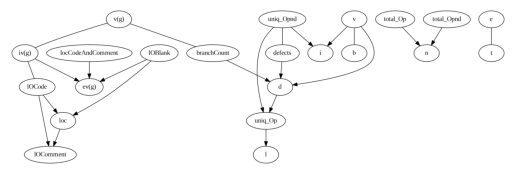

In [ ]:
from causallearn.search.ConstraintBased.PC import pc

labels = [f'{col}' for i, col in enumerate(df.columns)]
data = df_scaled

cg = pc(data)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
pyd.write_png('img_causal_PC_original.png')
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

GES algorithm

In [ ]:
# For Cyclomatic complexity
df1 = df[['defects','lOCode', 'v(g)','d','i','e']]
df1['defects'] = df1['defects'].astype(int)
df1.rename(columns={'v(g)': 'v_g'}, inplace=True)

/tmp/ipython-input-2066830889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['defects'] = df1['defects'].astype(int)
/tmp/ipython-input-2066830889.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'v(g)': 'v_g'}, inplace=True)


In [ ]:
# For Essential complexity
df1 = df[['defects','lOCode', 'ev(g)','d','i','e']]
df1['defects'] = df1['defects'].astype(int)
df1.rename(columns={'ev(g)': 'ev_g'}, inplace=True)

/tmp/ipython-input-2745327199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['defects'] = df1['defects'].astype(int)
/tmp/ipython-input-2745327199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'ev(g)': 'ev_g'}, inplace=True)


In [ ]:
# For Design complexity
df1 = df[['defects','lOCode', 'iv(g)','d','i','e']]
df1['defects'] = df1['defects'].astype(int)
df1.rename(columns={'iv(g)': 'iv_g'}, inplace=True)

/tmp/ipython-input-420537054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['defects'] = df1['defects'].astype(int)
/tmp/ipython-input-420537054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'iv(g)': 'iv_g'}, inplace=True)


In [ ]:

#df1.rename(columns={'iv(g)': 'iv_g'}, inplace=True)
#df1.rename(columns={'ev(g)': 'ev_g'}, inplace=True)

/tmp/ipython-input-3005030073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'v(g)': 'v_g'}, inplace=True)



defects: Target variable — number of known defects in the software module. Often binary (0 = no defect, 1 = defect), but can be count-based in some versions.
loc- Lines of Code — total number of lines in the module, including code, comments, and blanks.
loCode-Lines of Code (actual) — lines containing executable code only.
locomment-Lines of Comments — lines that contain comments/documentation.
v(g)- Cyclomatic Complexity — number of independent paths through the code. Higher values indicate more complex logic.


n: Halstead's length metric.
v: Halstead's volume metric. High v indicates large codebase size—may be harder to maintain or understand.
l: Halstead's program length estimate.
d: Halstead's difficulty metric. High d suggests the code is complex and potentially error-prone.
i: Halstead's intelligence content.
e: Halstead's effort metric. High e implies more cognitive effort is needed to write or understand the code.


Example Insights You Might Discover
High v(g) (cyclomatic complexity) often correlates with more defects.

Larger loc or total_Opnd may indicate more defect-prone modules.

Low lOComment relative to loc might signal poor documentation and higher defect risk.

Does high complexity cause more defects?

Exploratory Data Analysis (EDA)
Plot correlations between each metric and defects.

Use scatter plots or heatmaps to identify strong predictors.

Check for multicollinearity (e.g., total_Op and total_Opnd might be highly correlated).

the NASA PROMISE dataset — a well-known benchmark in software defect prediction.
ev_g: 	Essential Complexity — complexity after removing structured programming constructs. Indicates how well-structured the code is.
iv_g: Design Complexity — measures how complex the module is from a design perspective, factoring in interactions between components.
total_opnd: Total Operands — total count of all operands used.
total_op: Total Operators — total count of all operators used.
Unique-Opnd: Unique Operands — number of distinct operands (e.g., variables, constants) used.
Unique-Op: Unique Operators — number of distinct operators (e.g., +, if, return) used in the module.
v_g: Cyclomatic Complexity — number of independent paths through the code. Higher values indicate more complex logic.
LoComment: Lines of Comments — lines that contain comments/documentation.
LoCode: Lines of Code (actual) — lines containing executable code only.
Loc: Lines of Code — total number of lines in the module, including code, comments, and blanks.
defects: Target variable — number of known defects in the software module. Often binary (0 = no defect, 1 = defect), but can be count-based in some versions.


High v(g) or ev(g) → More complex logic → Higher defect risk.

Low lOComment / high lOCode → Poor documentation → Higher defect risk.

High uniq_Opnd and total_Opnd → More variables and operands → Potential for more bugs.

High iv(g) → Poor design structure → More defects likely.

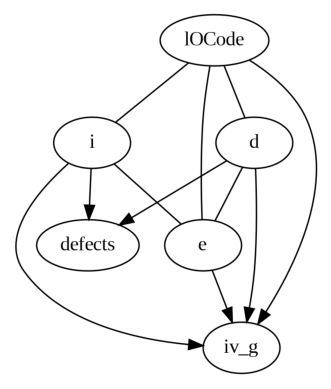

In [ ]:
from causallearn.search.ScoreBased.GES import ges

# default parameters
Record = ges(df1.values)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

labels = [f'{col}' for i, col in enumerate(df1.columns)]
pyd = GraphUtils.to_pydot(Record['G'], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# or save the graph
pyd.write_png('kc1_GES_df1_DC.png')

In [ ]:
import graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 amd64 2.24.33-2ubuntu2.1 [15.9 kB]
Get:4 http://archive.ubun

In [ ]:
#Final graph for cyclomatic complexity
# Define the causal graph using dowhy's graph notation
# The graph is represented as a string in DOT format
causal_graph = """digraph {
    v_g -> e;
    v_g -> i;
    v_g -> defects;
    v_g -> d;
    lOCode -> d;
    d -> defects;
    v_g -> lOCode;
    e -> lOCode;
    i -> lOCode;
    i -> defects;

}"""



In [ ]:
# Final graph for Essential Complexity
# Define the causal graph using dowhy's graph notation
# The graph is represented as a string in DOT format
causal_graph = """digraph {

    lOCode -> e;
    lOCode -> i;
    lOCode -> d;
    lOCode -> ev_g;
    d -> e;
    d -> ev_g;
    d -> defects ;
    e -> ev_g;
    i -> e;
    i -> ev_g;
    i -> defects;
    ev_g -> defects;
}"""



In [ ]:
# Final graph for Design Complexity
# Define the causal graph using dowhy's graph notation
# The graph is represented as a string in DOT format
causal_graph = """digraph {

    lOCode -> e;
    lOCode -> i;
    lOCode -> d;
    lOCode -> iv_g;
    d -> e;
    d -> iv_g;
    d -> defects ;
    e -> iv_g;
    i -> e;
    i -> iv_g;
    i -> defects;

}"""

To Construct SCM

In [ ]:
# For Cyclomatic complexity
import networkx as nx
causal_graph = nx.DiGraph([('v_g', 'e'), ('v_g', 'i'), ('v_g','defects'), ('v_g','d'), ('lOCode','d'), ('d', 'defects'), ('i', 'defects'),('i','lOCode'), ('v_g','lOCode'),  ('e','lOCode') ])


In [ ]:
# For essential Complexity
import networkx as nx
causal_graph = nx.DiGraph([('ev_g', 'defects'), ('lOCode', 'd'), ('lOCode', 'e'), ('lOCode', 'i'), ('lOCode', 'ev_g'), ('d','ev_g'), ('d','e'), ('d','defects'),('e','ev_g'), ('i','e'), ('i', 'ev_g'), ('i', 'defects') ])


In [ ]:
# For Design Complexity
import networkx as nx
causal_graph = nx.DiGraph([ ('lOCode', 'd'), ('lOCode', 'e'), ('lOCode', 'i'), ('lOCode', 'iv_g'), ('d','iv_g'), ('d','e'),('e','iv_g'), ('i','e'), ('i', 'iv_g'), ('i', 'defects'), ('d','defects') ])


In [ ]:
from dowhy import CausalModel, gcm
import pandas as pd

In [ ]:
from dowhy import gcm
causal_model = gcm.StructuralCausalModel(causal_graph)

In [ ]:
# Set causal mechanisms for each node for cyclomatic complexity
causal_model.set_causal_mechanism('v_g', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('defects', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('i', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('e', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('lOCode', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('d', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))


# Now fit the model , Fitting the SCM to the data
gcm.fit(causal_model, df1)



ValueError: Node v_g can not be found in the given graph!

In [ ]:
# Set causal mechanisms for each node for essential complexity
causal_model.set_causal_mechanism('lOCode', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('defects', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('i', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('e', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('ev_g', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('d', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))


# Now fit the model , Fitting the SCM to the data
gcm.fit(causal_model, df1)


Fitting causal mechanism of node i: 100%|██████████| 6/6 [00:00<00:00, 180.96it/s]


In [ ]:
# Set causal mechanisms for each node for Design complexity
causal_model.set_causal_mechanism('lOCode', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('defects', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('i', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('e', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('iv_g', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('d', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))


# Now fit the model , Fitting the SCM to the data
gcm.fit(causal_model, df1)

Fitting causal mechanism of node defects: 100%|██████████| 6/6 [00:00<00:00, 239.03it/s]


Test permutations of given graph: 100%|██████████| 50/50 [00:20<00:00,  2.48it/s]


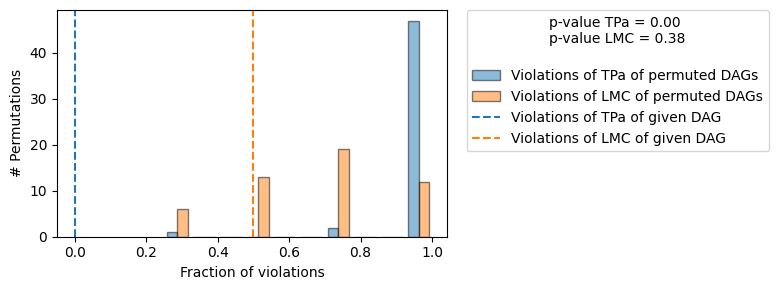

Evaluated the performance of the causal mechanisms and the invertibility assumption of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the under

In [ ]:
print(gcm.evaluate_causal_model(causal_model, df1))

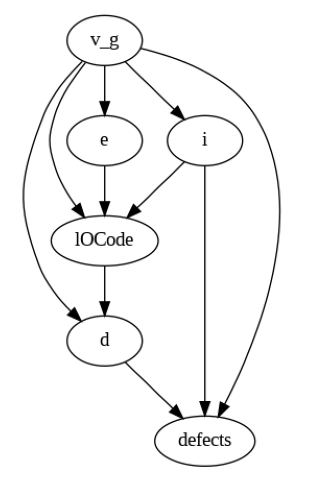

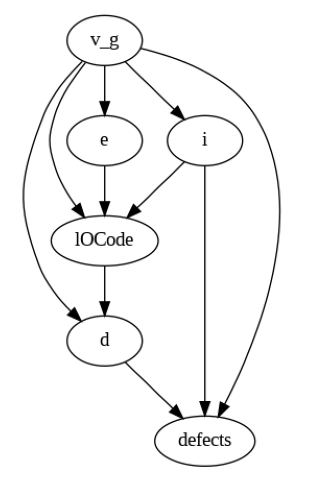

In [ ]:
# For Cyclomatic complexity
model=CausalModel(
        data = df1,
        treatment='v_g',
        outcome='defects',
        graph=causal_graph,
        )
model.view_model(layout="dot")
model.view_model(file_name="causal_model_CC.png") # Save the plot to a file

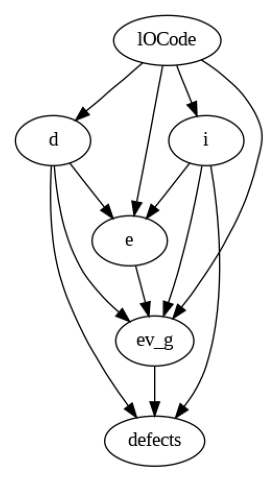

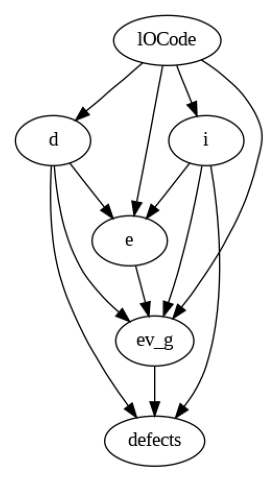

In [ ]:
# For Essential complexity
model=CausalModel(
        data = df1,
        treatment='e',
        outcome='defects',
        graph=causal_graph,
        )
model.view_model(layout="dot")
model.view_model(file_name="causal_model_final_EC") # Save the plot to a file

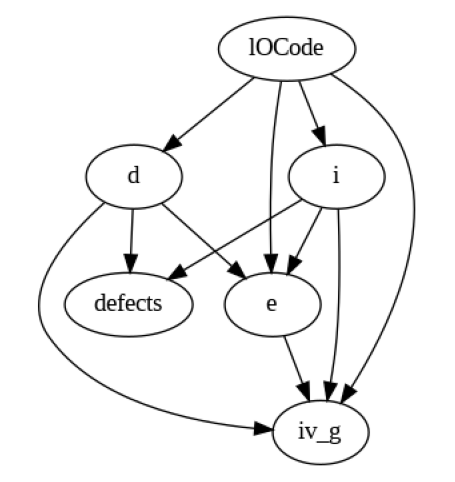

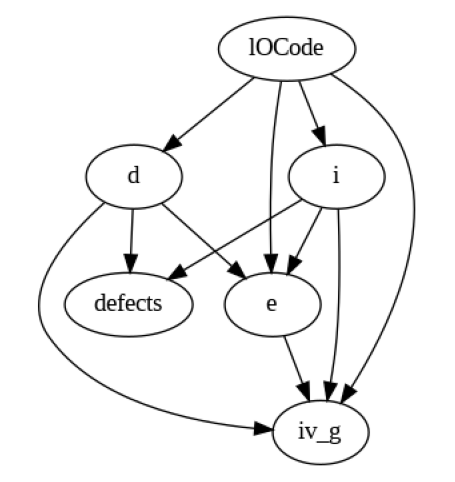

In [ ]:
# For Design complexity
model=CausalModel(
        data = df1,
        treatment='iv_g',
        outcome='defects',
        graph=causal_graph,
        )
model.view_model(layout="dot")
model.view_model(file_name="causal_model_final_DC") # Save the plot to a file

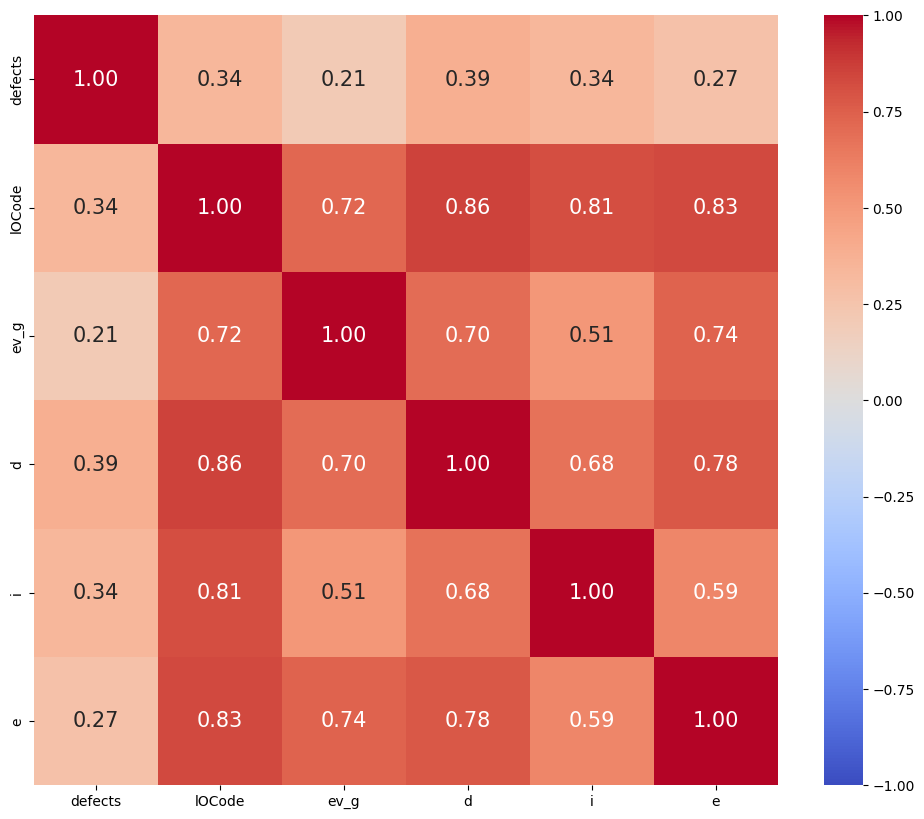

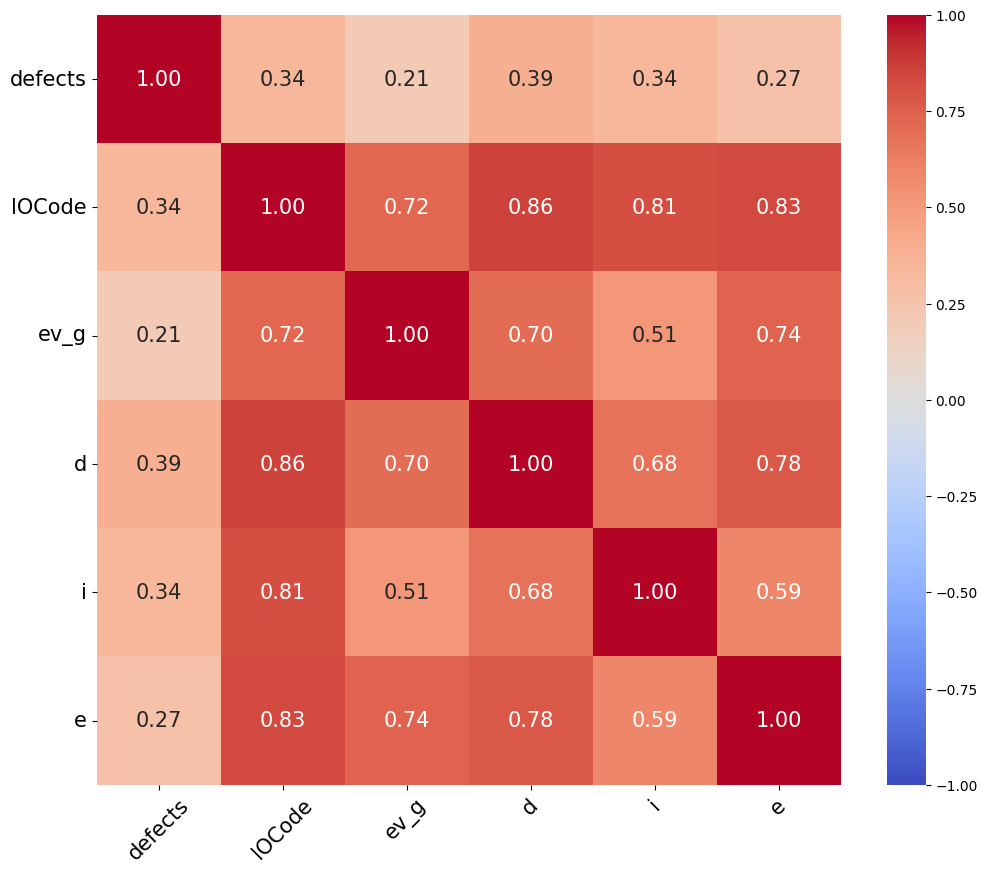

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot heatmap for feature variables
corr = df1.corr()
plt.figure(figsize=[12,10])
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,annot_kws={"size":15})
#plt.xticks(rotation=60)
import matplotlib.pyplot as plt
import seaborn as sns
# plot heatmap for feature variables
corr = df1.corr()
plt.figure(figsize=[12,10])
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,annot_kws={"size":15})
#plt.xticks(rotation=60)
#plt.title("Heatmap of Correlation Coefficient for Bug Feature Variables", size=10);
plt.xticks(rotation=45,size=15)
plt.yticks(rotation=0, size=15)
#plt.title("Heatmap of Correlation Coefficient for Bug Feature Variables", size=14);

plt.savefig('corrplot-kc1.png', bbox_inches='tight', pad_inches=0.0)


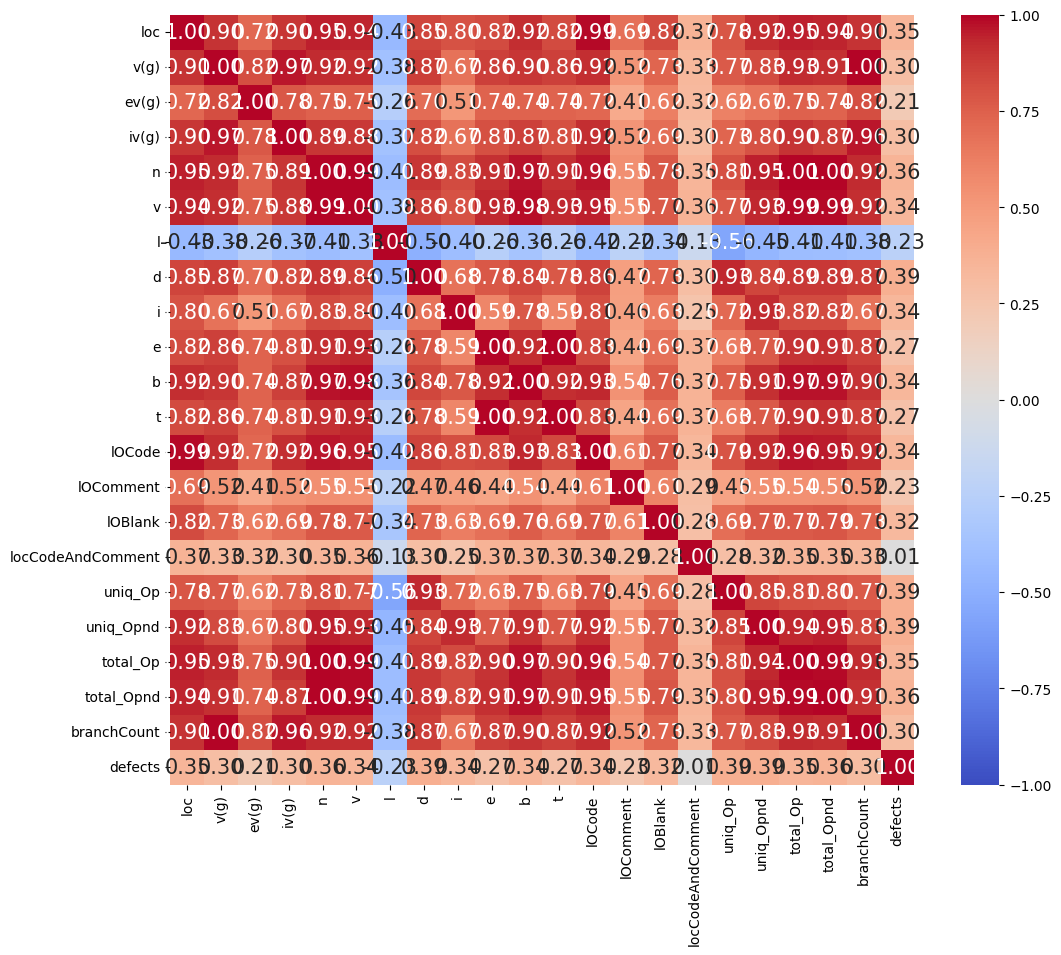

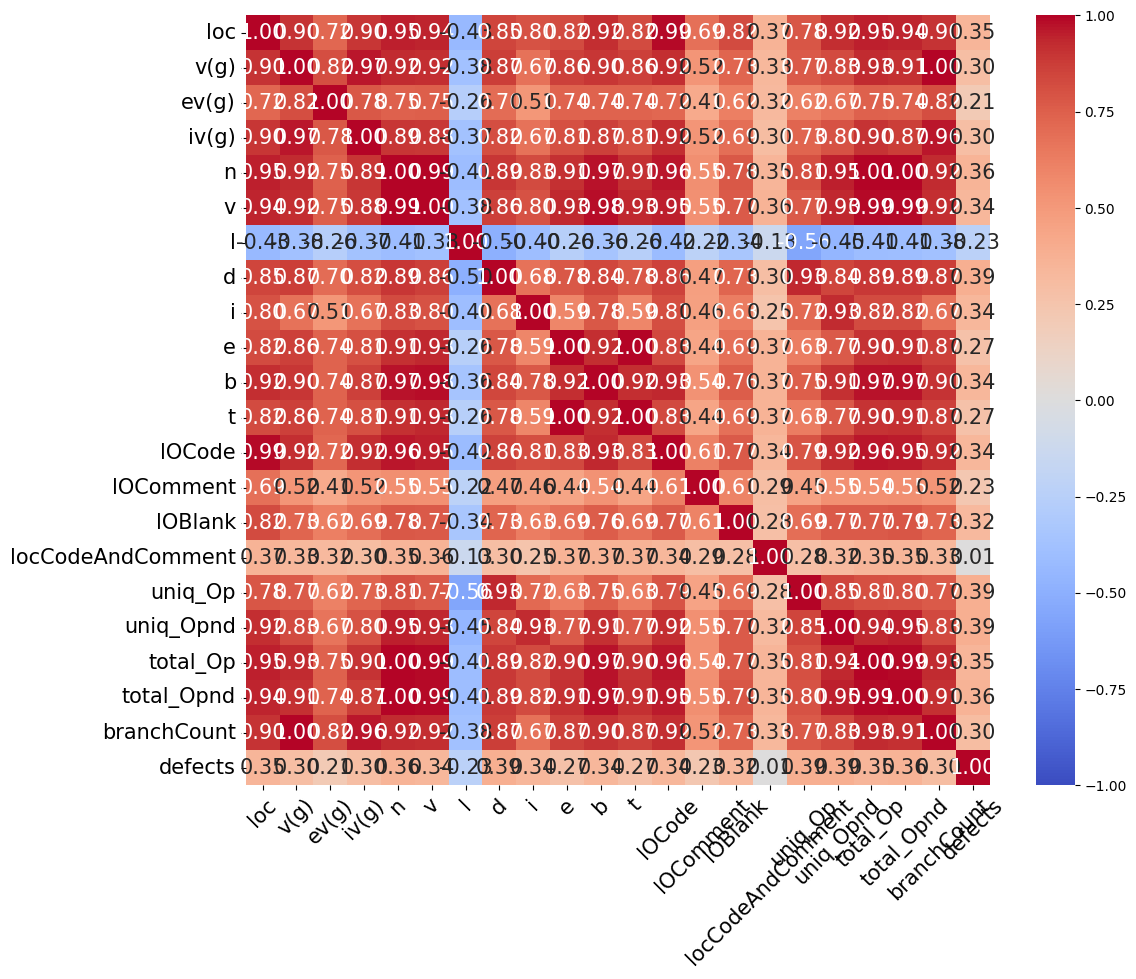

In [ ]:
#Avoid
import matplotlib.pyplot as plt
import seaborn as sns
# plot heatmap for feature variables
corr = df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,annot_kws={"size":15})
#plt.xticks(rotation=60)
import matplotlib.pyplot as plt
import seaborn as sns
# plot heatmap for feature variables
corr = df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,annot_kws={"size":15})
#plt.xticks(rotation=60)
#plt.title("Heatmap of Correlation Coefficient for Bug Feature Variables", size=10);
plt.xticks(rotation=45,size=15)
plt.yticks(rotation=0, size=15)
#plt.title("Heatmap of Correlation Coefficient for Bug Feature Variables", size=14);

plt.savefig('corrplot-kc1-total.png', bbox_inches='tight', pad_inches=0.0)


In [ ]:
# Compute correlation matrix
corr_matrix = df1.corr()

# Save to CSV
corr_matrix.to_csv('correlation_matrix-kc1-DC.csv')

# Or display as a table
print(corr_matrix)


          defects    lOCode      iv_g         d         i         e
defects  1.000000  0.341529  0.295694  0.387493  0.342854  0.270070
lOCode   0.341529  1.000000  0.916920  0.858635  0.814257  0.833695
iv_g     0.295694  0.916920  1.000000  0.815358  0.674493  0.807287
d        0.387493  0.858635  0.815358  1.000000  0.679523  0.778999
i        0.342854  0.814257  0.674493  0.679523  1.000000  0.592246
e        0.270070  0.833695  0.807287  0.778999  0.592246  1.000000


In [ ]:
#kc1 only
 #Convert 'problems' column to numerical (1 for 'yes', 0 for 'no')
df['defects'] = df['defects'].map({'yes': 1, 'no': 0})

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Save to CSV
corr_matrix.to_csv('correlation_matrix-kc1.csv')

# Or display as a table
print(corr_matrix)

                        loc      v(g)     ev(g)     iv(g)         n         v  \
loc                1.000000  0.902619  0.718833  0.895167  0.948510  0.938516   
v(g)               0.902619  1.000000  0.819965  0.965689  0.922511  0.915556   
ev(g)              0.718833  0.819965  1.000000  0.775740  0.746253  0.753569   
iv(g)              0.895167  0.965689  0.775740  1.000000  0.893768  0.884920   
n                  0.948510  0.922511  0.746253  0.893768  1.000000  0.994956   
v                  0.938516  0.915556  0.753569  0.884920  0.994956  1.000000   
l                 -0.432179 -0.379873 -0.260710 -0.369299 -0.412032 -0.375790   
d                  0.846844  0.868341  0.698391  0.815358  0.891586  0.860161   
i                  0.802832  0.673304  0.511383  0.674493  0.826783  0.799857   
e                  0.821338  0.862413  0.738864  0.807287  0.908211  0.934930   
b                  0.918359  0.896867  0.738853  0.866989  0.973711  0.978958   
t                  0.821337 

Identification

Halstead Metrics (n, v, l, d, i, e, b, t). These metrics are derived from Halstead's software science, which quantifies software complexity based on operators and operands in the code. They're commonly used in defect prediction models to estimate software quality and maintainability.

Strategic Applications
Defect Prediction: Use metrics like b, e, and d to train models that predict defect-prone modules.

Code Review Prioritization: Focus reviews on files with high v, d, or low lOComment.

Maintainability Assessment: Combine Halstead and structural metrics to evaluate long-term maintainability.

Common Defects Linked to High Complexity Metrics
1. Logic Errors
Why: Complex control flows (e.g., high cyclomatic complexity) increase the likelihood of incorrect branching or condition handling.

Example: Incorrect if-else logic, unreachable code, or faulty loop conditions.

. Interface Misuse
Why: Modules with high coupling or low cohesion (e.g., high CBO or low LCOM) often misuse APIs or shared resources.

Example: Passing incorrect parameters, misusing shared variables, or violating expected input/output formats.

3. Calculation Errors
Why: High Halstead effort (e) and difficulty (d) suggest cognitively demanding code, which can lead to arithmetic or algorithmic mistakes.

Example: Incorrect formulas, rounding errors, or misapplied algorithms.

4. Resource Leaks
Why: Complex modules often have poor exception handling and resource management.
Example: Memory leaks, file handles not closed, or database connections left open.

5. Concurrency Issues
Why: High complexity often correlates with poor synchronization and race conditions.

Example: Deadlocks, race conditions, or inconsistent shared state.

6. Poor Maintainability Leading to Regression Defects
Why: High v (volume) and low lOComment make code harder to understand and modify safely.

Example: Fixes that unintentionally break other parts of the system.

In [ ]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                         
────(E[defects|i,d,lOCode])
d[e]                       
Estimand assumption 1, Unconfoundedness: If U→{e} and U→defects then P(defects|e,i,d,lOCode,U) = P(defects|e,i,d,lOCode)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
 d                         
────(E[defects|i,d,lOCode])
d[e]                       
Estimand assumption 1, Unconfoundedness: If U→{e} and U→defects then P(defects|e,i,d,lOCode,U) = P(defects|e,i,d,lOCode)



In [ ]:
estimate= model.estimate_effect(
 identified_estimand,
 method_name='backdoor.linear_regression',
 confidence_intervals=True,
  test_significance=True
)

print(f'Estimate of causal effect: {estimate}')

Estimate of causal effect: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d                         
────(E[defects|i,d,lOCode])
d[e]                       
Estimand assumption 1, Unconfoundedness: If U→{e} and U→defects then P(defects|e,i,d,lOCode,U) = P(defects|e,i,d,lOCode)

## Realized estimand
b: defects~e+i+d+lOCode
Target units: ate

## Estimate
Mean value: -1.5206779096499368e-06
p-value: [0.056]
95.0% confidence interval: [[-0.  0.]]



### Estimand : 1 for i on defects
Estimand name: backdoor
Estimand expression:
 d                     
────(E[defects|lOCode])
d[i]                   
Estimand assumption 1, Unconfoundedness: If U→{i} and U→defects then P(defects|i,lOCode,U) = P(defects|i,lOCode)

## Realized estimand
b: defects~i+lOCode+i*d
Target units:

## Estimate
Mean value: 0.0035908464605419466
p-value: [0.]
95.0% confidence interval: (np.float64(0.0014848487485671436), np.float64(0.005288320451726725))
### Conditional Estimates
__categorical__d
(-0.001, 1.5]      0.003170
(1.5, 2.5]         0.003260
(2.5, 5.56]        0.003382
(5.56, 11.008]     0.003674
(11.008, 53.75]    0.004543

For Design Complexity
Estimand expression:
   d                   
───────(E[defects|d,i])
d[iv_g]                
Estimand assumption 1, Unconfoundedness: If U→{iv_g} and U→defects then P(defects|iv_g,d,i,U) = P(defects|iv_g,d,i)

## Realized estimand
b: defects~iv_g+d+i
Target units: ate

## Estimate
Mean value: -0.01322177964093027
p-value: [0.001]
95.0% confidence interval: [[-0.021 -0.006]]


# For Essential Complexity
### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
───────(E[defects|d,i])
d[ev_g]                
Estimand assumption 1, Unconfoundedness: If U→{ev_g} and U→defects then P(defects|ev_g,d,i,U) = P(defects|ev_g,d,i)

## Realized estimand
b: defects~ev_g+d+i
Target units: ate

## Estimate
Mean value: -0.02285483839510266
p-value: [0.]
95.0% confidence interval: [[-0.032 -0.014]]


### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d               
──────(E[defects])
d[v_g]            
Estimand assumption 1, Unconfoundedness: If U→{v_g} and U→defects then P(defects|v_g,,U) = P(defects|v_g,)

## Realized estimand
b: defects~v_g
Target units: ate

## Estimate
Mean value: 0.02739818324879416
p-value: [0.]
95.0% confidence interval: [[0.024 0.031]]

In [ ]:
#Textual Interpreter
interpretation = estimate.interpret(method_name="textual_effect_interpreter")

Increasing the treatment variable(s) [v_g] from 0 to 1 causes an increase of 0.02739818324879416 in the expected value of the outcome [['defects']], over the data distribution/population represented by the dataset.


Refutation

In [ ]:
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")
print(refute_results)

Refute: Add a random common cause
Estimated effect:-1.5206779096499368e-06
New effect:-1.5214366543547797e-06
p value:0.9199999999999999



Refute: Add a random common cause for Design Complexity
Estimated effect:-0.01322177964093027
New effect:-0.01323065072753803
p value:1.0


Refute: Add a random common cause for essential complexity
Estimated effect:-0.02285483839510266
New effect:-0.0228354615951731
p value:0.94

Refute: Add a random common cause for cyclomatic complexity
Estimated effect:0.02739818324879416
New effect:0.02739747508616771
p value:0.96

In [ ]:
refutel_common_cause=model.refute_estimate(identified_estimand,estimate,"data_subset_refuter")
print(refutel_common_cause)

Refute: Use a subset of data
Estimated effect:-1.5206779096499368e-06
New effect:-1.386630601441785e-06
p value:0.8600000000000001



Refute: Use a subset of data v_g
Estimated effect:0.008116542975618833
New effect:0.008093236071439011
p value:0.98

In [ ]:
refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute", num_simulations=100)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:-1.5206779096499368e-06
New effect:3.703502739677012e-08
p value:0.98



Refute: Use a Placebo Treatment v_g
Estimated effect:0.008116542975618833
New effect:0.0005137592023183447
p value:0.8600000000000001
